In [211]:
import numpy as np
from sklearn import datasets
from sklearn.inspection import DecisionBoundaryDisplay

In [212]:
dataset = datasets.make_classification(n_samples =100, n_features=2, n_redundant = 0)

In [213]:
X, y = dataset
y = y.reshape(-1,1)
X.shape, y.shape

((100, 2), (100, 1))

In [236]:
class LogisticRegression:
    
    def __init__(self, lr, n_features):
        self.lr = lr
        self.w = np.zeros((n_features,1))
        # X = > M, N
        # Y = > M, 1
        # W = > N, 1
    
    def loss(self, X, y_hat, y):
        m = X.shape[0]
        return  (-1/m) * np.sum(y * np.log(y_hat) + (1-y)*np.log(1-y_hat))
    
    def sigmoid(self, Z):
        return (1/(1 + np.exp(-Z)))
    
    def gradient(self, X, y_hat, y):

        return X.T @ (y_hat - y)
    
    def predict(self, X):
        return self.sigmoid(X @ self.w)
    
    def fit(self, X, y):

        predict = self.sigmoid(X @ self.w)
        loss = self.loss(X, predict, y)
        self.w = self.w - self.lr * self.gradient(X, predict, y)
        print("loss is ", loss.mean())
            
        
        

In [237]:
model = LogisticRegression(lr=1e-1, n_features = X.shape[1])

loss is  0.19850155358903998


/var/folders/6v/9gb458t90k7dvc1hvl02dr4w0000gn/T/ipykernel_1945/2503112746.py:26: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[row_ix, 0], X[row_ix, 1], cmap='Paired')


loss is  0.19850155358903987
loss is  0.19850155358904004
loss is  0.19850155358903995
loss is  0.19850155358904012
loss is  0.19850155358903998
loss is  0.1985015535890401
loss is  0.1985015535890399
loss is  0.19850155358903998
loss is  0.1985015535890401
loss is  0.19850155358904012
loss is  0.19850155358903984
loss is  0.1985015535890399
loss is  0.19850155358903998
loss is  0.19850155358903998
loss is  0.19850155358904004
loss is  0.19850155358904004
loss is  0.19850155358904012
loss is  0.19850155358904012
loss is  0.19850155358904012
loss is  0.19850155358903984
loss is  0.19850155358903984
loss is  0.19850155358903984
loss is  0.1985015535890399
loss is  0.19850155358903995
loss is  0.19850155358903987
loss is  0.1985015535890399
loss is  0.1985015535890399
loss is  0.1985015535890399
loss is  0.1985015535890399
loss is  0.1985015535890399
loss is  0.19850155358903995
loss is  0.19850155358903995
loss is  0.19850155358903995
loss is  0.19850155358903995
loss is  0.1985015535890

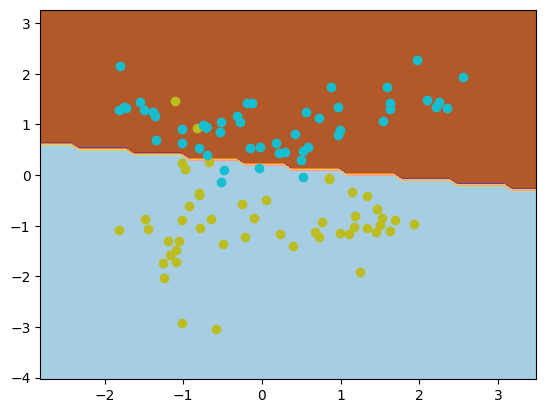

In [244]:
import time
from matplotlib import interactive
interactive(True)
epochs = 100
for i in range(epochs):
    model.fit(X, y)
    plot_decision(model, X, 0.7)
    time.sleep(0.3)

# Decision boundary

In [239]:
import matplotlib.pyplot as plt
%matplotlib inline

In [232]:
def plot_decision(classifier, X, threshold):
    min1, max1 = X[:, 0].min()-1, X[:, 0].max()+1
    min2, max2 = X[:, 1].min()-1, X[:, 1].max()+1
    
    x1grid = np.arange(min1, max1, 0.1)
    x2grid = np.arange(min2, max2, 0.1)
    xx, yy = np.meshgrid(x1grid, x2grid)
    
    r1, r2 = xx.flatten(), yy.flatten()
    r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
    
    grid = np.hstack((r1,r2))
    
    yhat = model.predict(grid)
    yhat[yhat >= threshold] = 1
    yhat[yhat < threshold] = 0
    
    zz = yhat.reshape(xx.shape)
    
    plt.contourf(xx, yy, zz, cmap='Paired')
    # create scatter plot for samples from each class
    for class_value in range(2):
        # get row indexes for samples with this class
        row_ix = np.where(y == class_value)
        # create scatter of these samples
        plt.scatter(X[row_ix, 0], X[row_ix, 1], cmap='Paired')

/var/folders/6v/9gb458t90k7dvc1hvl02dr4w0000gn/T/ipykernel_1945/2503112746.py:26: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[row_ix, 0], X[row_ix, 1], cmap='Paired')


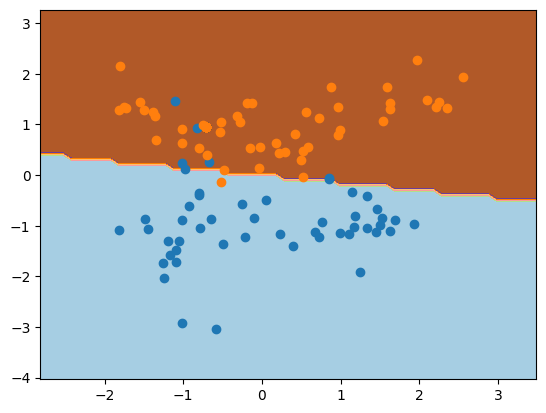

In [234]:
plot_decision(model, X, 0.5)

/var/folders/6v/9gb458t90k7dvc1hvl02dr4w0000gn/T/ipykernel_1945/2412491406.py:7: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[row_ix, 0], X[row_ix, 1], cmap='Paired')


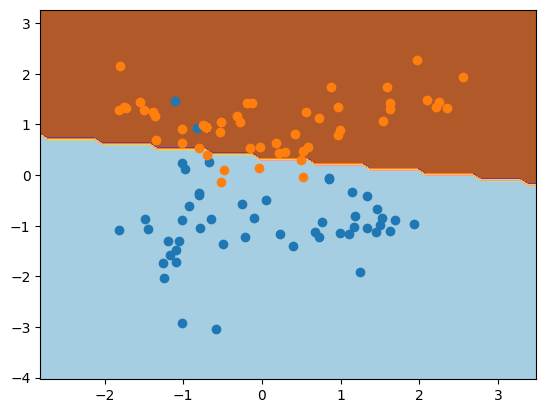

In [228]:
yhat

array([[4.07826249e-08],
       [4.31340004e-08],
       [4.56209476e-08],
       ...,
       [9.99999411e-01],
       [9.99999443e-01],
       [9.99999474e-01]])